# **Are the days of the week important for wholesaler?**

This notebook analyzes weekday and weekend sales differences.
 By running statistical tests and visualizing sales trends by category and product, we will discover whether sales behavior varies significantly by day of the week.

**Main Objectives:**
 - Comparing weekday and weekend sales distribution

 - Perform statistical tests to determine whether the differences between sales are significant
 
 - Which categories sell the most on weekdays and weekends?
 - Which categories are most affected by day type (weekday/weekend)?
 - The 10 best-selling products on weekdays and weekends
 - Analyzing weekday and weekend sales trends during the year and identifying trends

In [20]:
import pandas as pd
import numpy as np
from datetime import timedelta
import random

import matplotlib.pyplot as plt

import seaborn as sns
sns.set_theme(style="darkgrid")

import warnings
warnings.filterwarnings('ignore')

------

Since we get it from a cleaned database, there is no need to do anything to the data as it is clean and organized.

In [21]:
df = pd.read_csv('C:\cursor_ai\data.csv')

df['date'] = pd.to_datetime(df['date'] )

df.drop(columns='Unnamed: 0',inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36500 entries, 0 to 36499
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         36500 non-null  datetime64[ns]
 1   product_id   36500 non-null  object        
 2   category     36500 non-null  object        
 3   price        36500 non-null  float64       
 4   sales        36500 non-null  int64         
 5   stock        36500 non-null  int64         
 6   stock_time   36500 non-null  int64         
 7   day_of_week  36500 non-null  int64         
 8   is_weekend   36500 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 2.3+ MB


In [22]:
df['date'].describe

<bound method NDFrame.describe of 0       2023-01-01
1       2023-01-01
2       2023-01-01
3       2023-01-01
4       2023-01-01
           ...    
36495   2023-12-31
36496   2023-12-31
36497   2023-12-31
36498   2023-12-31
36499   2023-12-31
Name: date, Length: 36500, dtype: datetime64[ns]>

##  **EDA**

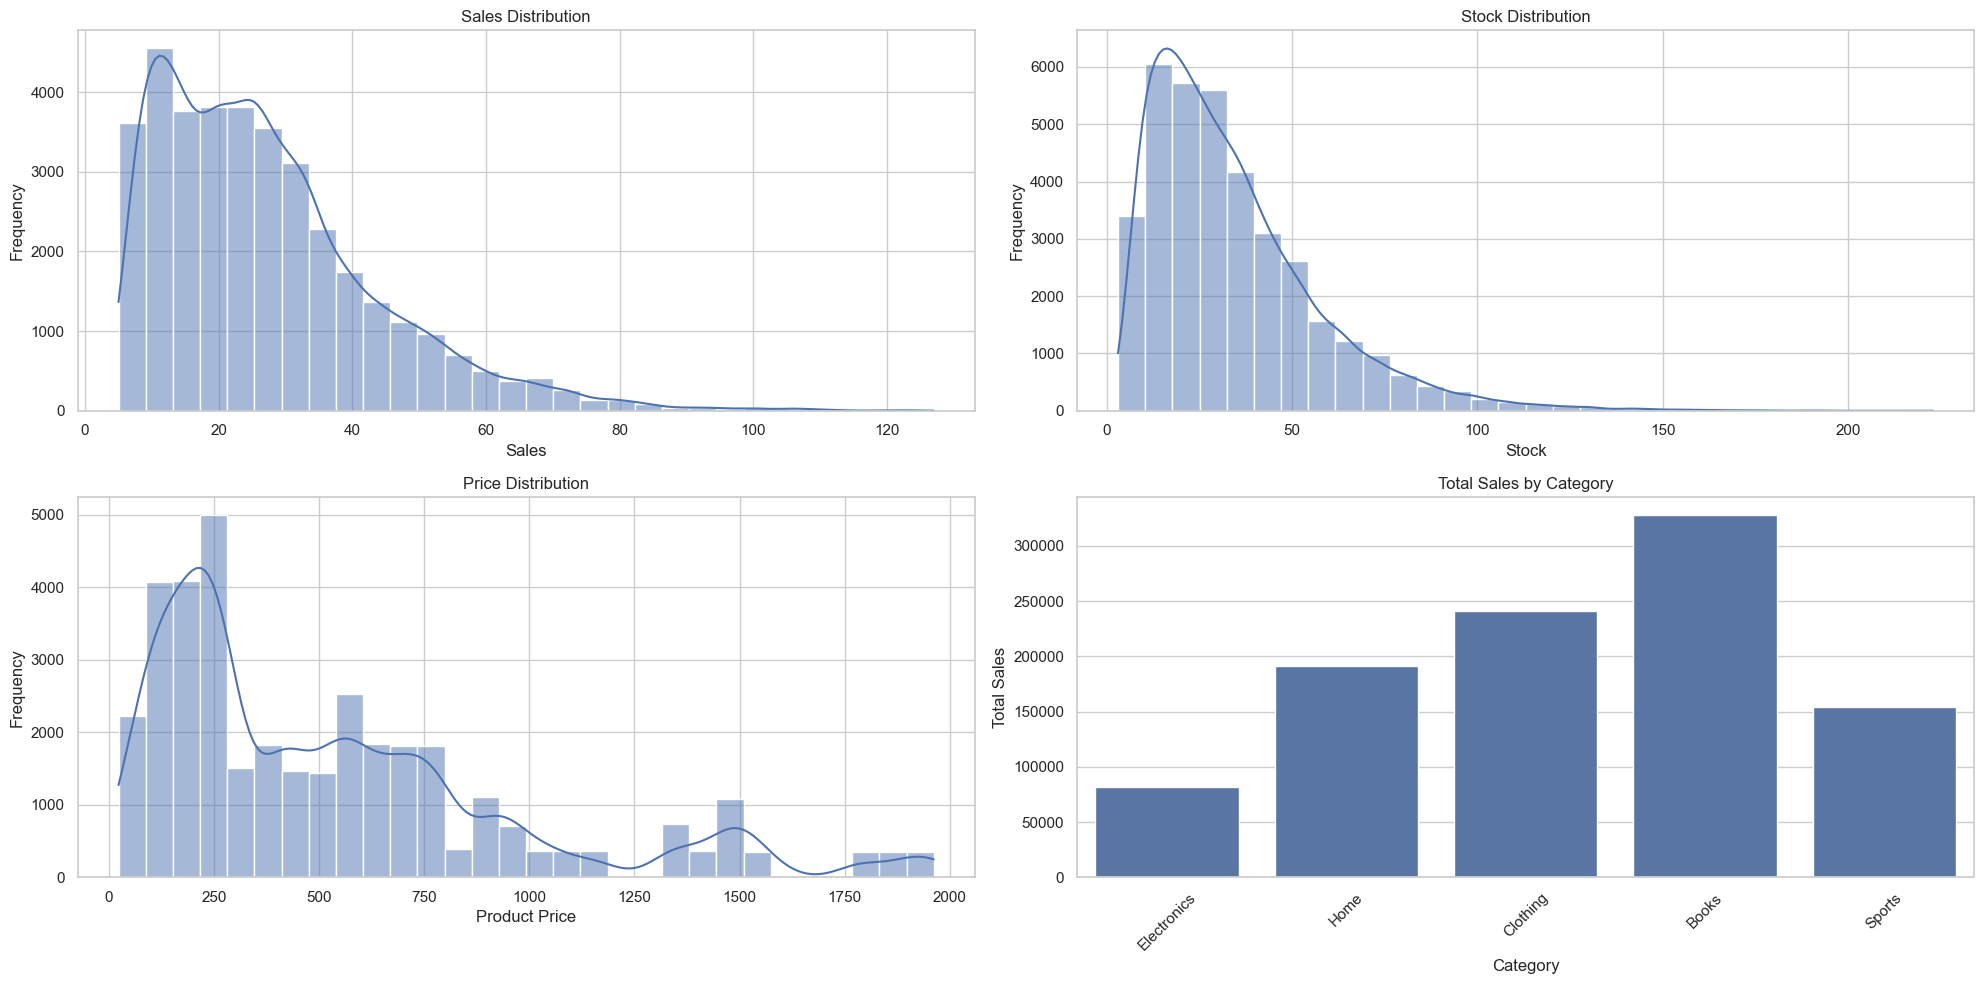

In [23]:
sns.set_style("whitegrid")
# Create subplots with 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

# Sales distribution histogram
sns.histplot(data=df, x='sales', bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Sales Distribution')
axes[0, 0].set_xlabel('Sales')
axes[0, 0].set_ylabel('Frequency')

# Stock distribution histogram
sns.histplot(data=df, x='stock', bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Stock Distribution')
axes[0, 1].set_xlabel('Stock')
axes[0, 1].set_ylabel('Frequency')

# Price distribution histogram
sns.histplot(data=df, x='price', bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Price Distribution')
axes[1, 0].set_xlabel('Product Price')
axes[1, 0].set_ylabel('Frequency')

# Bar plot showing total sales by category
sns.barplot(data=df, x='category', y='sales', estimator=sum, ci=None, ax=axes[1, 1])
axes[1, 1].set_title('Total Sales by Category')
axes[1, 1].set_xlabel('Category')
axes[1, 1].set_ylabel('Total Sales')
axes[1, 1].tick_params(axis='x', rotation=45)  # Rotate category labels for better readability

plt.tight_layout()
plt.show()


### **Week-in, week-out sales comparisons;**

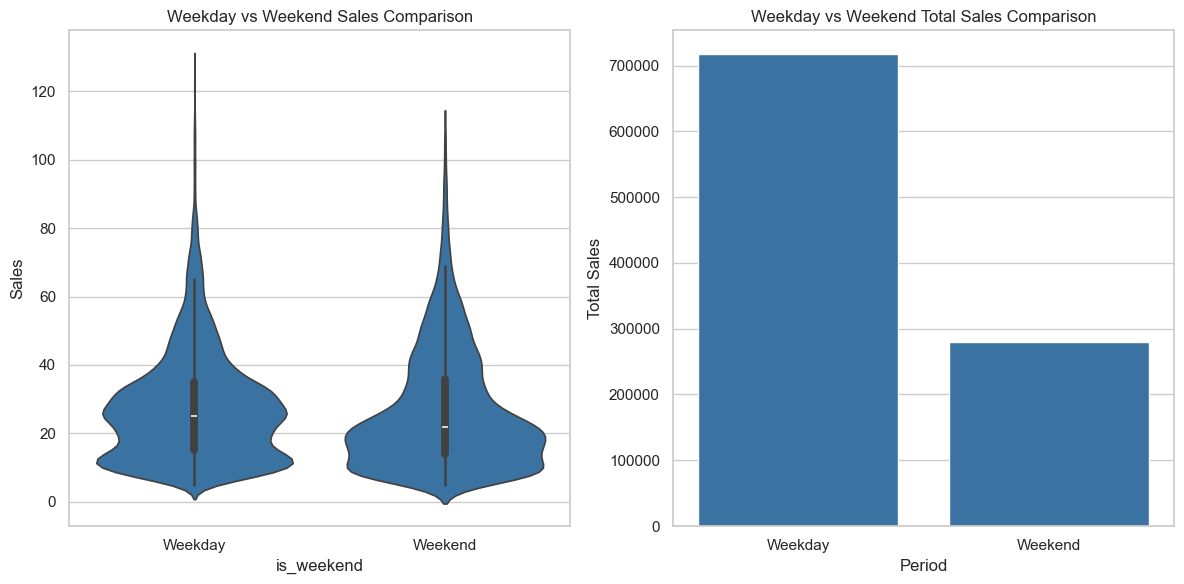

In [24]:
# Visualizing Weekday vs Weekend Sales with Statistical Testing

df['is_weekend'] = df['date'].dt.weekday >= 5
weekend_sales = df[df['is_weekend']]['sales'].sum()
weekday_sales = df[~df['is_weekend']]['sales'].sum()

# Create two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Violin plot
sns.violinplot(data=df, x='is_weekend', y='sales', ax=ax1, color='#2973B2')
ax1.set_title('Weekday vs Weekend Sales Comparison')
ax1.set_ylabel('Sales')
ax1.set_xticks([0, 1])
ax1.set_xticklabels(['Weekday', 'Weekend'])

# Bar plot - Total sales
sales_data = pd.DataFrame({
    'Period': ['Weekday', 'Weekend'],
    'Total Sales': [weekday_sales, weekend_sales]
})

sns.barplot(data=sales_data, x='Period', y='Total Sales', ax=ax2, color='#2973B2')
ax2.set_title('Weekday vs Weekend Total Sales Comparison')
ax2.set_ylabel('Total Sales')

plt.tight_layout()
plt.show()


### **Categorical comparison**

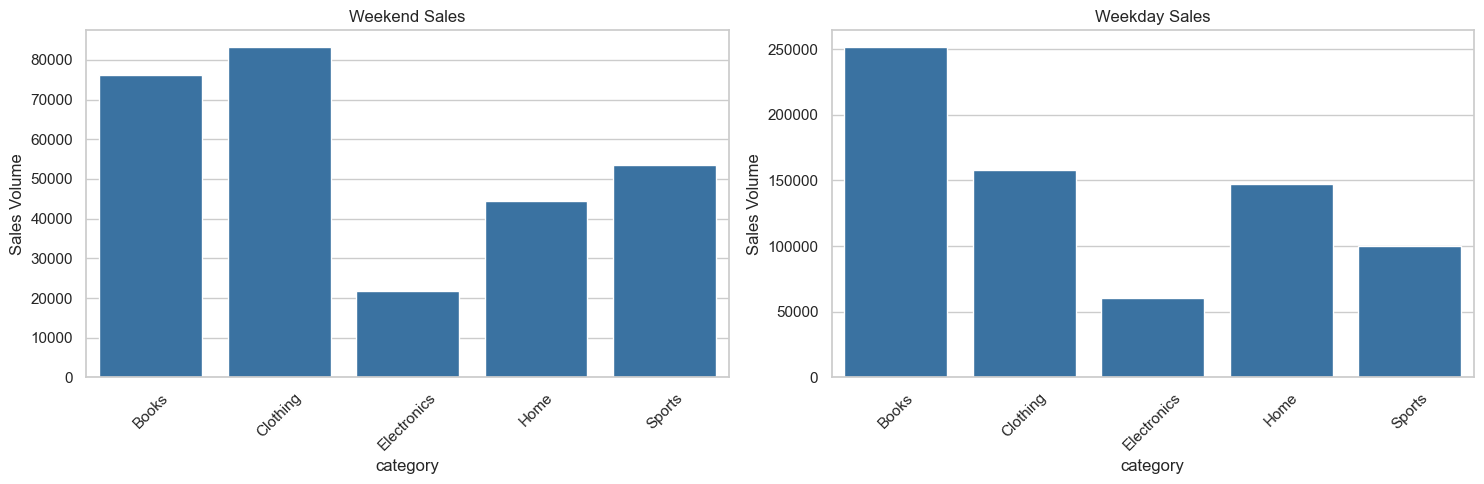

In [25]:
# Category-Based Weekday vs Weekend Sales

weekend_category_sales = df[df['is_weekend']].groupby('category')['sales'].sum().reset_index()
weekday_category_sales = df[~df['is_weekend']].groupby('category')['sales'].sum().reset_index()

# Merge sales data
category_sales_comparison = pd.merge(
    weekend_category_sales, 
    weekday_category_sales, 
    on='category', 
    how='outer', 
    suffixes=('_weekend', '_weekday')
).fillna(0)

plt.figure(figsize=(15, 5))

# Create two subplots
plt.subplot(1, 2, 1)
sns.barplot(data=category_sales_comparison, x='category', y='sales_weekend', color='#2973B2')
plt.title('Weekend Sales')
plt.xticks(rotation=45)
plt.ylabel('Sales Volume')

plt.subplot(1, 2, 2)
sns.barplot(data=category_sales_comparison, x='category', y='sales_weekday', color='#2973B2')
plt.title('Weekday Sales')
plt.xticks(rotation=45)
plt.ylabel('Sales Volume')

plt.tight_layout()
plt.show()


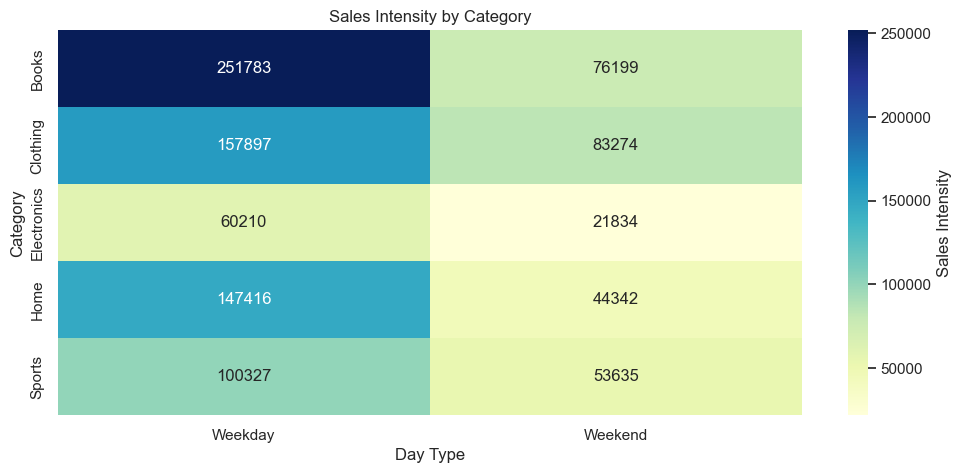

In [26]:
plt.figure(figsize=(12,5))

pivot_table = df.pivot_table(values='sales', index='category', columns='is_weekend', aggfunc='sum')
pivot_table.columns = ['Weekday', 'Weekend']  

sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='YlGnBu', cbar_kws={'label': 'Sales Intensity'})
plt.title('Sales Intensity by Category')
plt.xlabel('Day Type')
plt.ylabel('Category')
plt.show()


In [27]:
weekend_category_sales = df[df['is_weekend']].groupby('category')['sales'].sum().reset_index()
weekday_category_sales = df[~df['is_weekend']].groupby('category')['sales'].sum().reset_index()


category_sales_comparison = pd.merge(weekend_category_sales, weekday_category_sales, on='category', how='outer', suffixes=('_weekend', '_weekday')).fillna(0)


category_sales_comparison['difference'] = category_sales_comparison['sales_weekend'] - category_sales_comparison['sales_weekday']

print("Category-based weekend and weekday sales differences:")
category_sales_comparison

Category-based weekend and weekday sales differences:


,category,sales_weekend,sales_weekday,difference
0,Books,76199,251783,-175584
1,Clothing,83274,157897,-74623
2,Electronics,21834,60210,-38376
3,Home,44342,147416,-103074
4,Sports,53635,100327,-46692


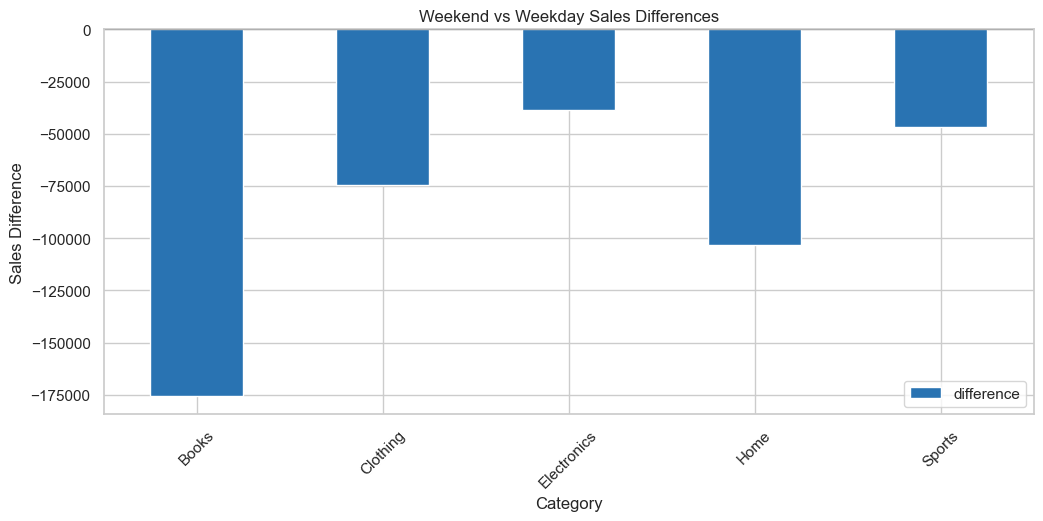

In [28]:
category_sales_comparison.plot(x='category', y='difference', kind='bar', color='#2973B2', 
                               title='Weekend vs Weekday Sales Differences', figsize=(12,5))
plt.ylabel('Sales Difference')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.axhline(0, color='black', linewidth=0.8) 
plt.show()


### **Hypothesis testing**

+ H₀ (Null Hypothesis): There is no statistically significant difference between the medians of weekday and weekend sales. In other words, sales have similar distribution on weekdays and weekends.

+ H₁ (Alternative Hypothesis): There is a statistically significant difference between the medians of weekday and weekend sales. In other words, sales vary on different days of the week.

In [29]:
# Separating weekday and weekend sales into different lists
weekday_sales = df[~df['is_weekend']]['sales']
weekend_sales = df[df['is_weekend']]['sales']

# First, performing normality test
from scipy import stats

print("Normality Test for Weekday Sales:")
print(stats.normaltest(weekday_sales))
print("\nNormality Test for Weekend Sales:")
print(stats.normaltest(weekend_sales))

# Homogeneity of variance test
print("\nLevene Test (Homogeneity of Variance):")
levene = stats.levene(weekday_sales, weekend_sales)
print(f"Statistic: {levene.statistic:.4f}")
print(f"p-value: {levene.pvalue:.4f}")

# Since the normality assumption is not met, we apply the Mann-Whitney U test
mann_whitney = stats.mannwhitneyu(weekday_sales, weekend_sales, alternative='two-sided')
print("\nMann-Whitney U Test Results:")
print(f"Statistic: {mann_whitney.statistic:.4f}")
print(f"p-value: {mann_whitney.pvalue:.4f}")

# Interpretation of the results
alpha = 0.05
print("\nHypothesis Test Result:")
if mann_whitney.pvalue < alpha:
    print(f"p-value ({mann_whitney.pvalue:.4f}) < {alpha}, thus the null hypothesis (H0) is rejected.")
    print("There is a statistically significant difference between weekday and weekend sales.")
else:
    print(f"p-value ({mann_whitney.pvalue:.4f}) > {alpha}, thus the null hypothesis (H0) cannot be rejected.")
    print("There is no statistically significant difference between weekday and weekend sales.")


Normality Test for Weekday Sales:
NormaltestResult(statistic=5939.771752813036, pvalue=0.0)

Normality Test for Weekend Sales:
NormaltestResult(statistic=2073.919896685083, pvalue=0.0)

Levene Test (Homogeneity of Variance):
Statistic: 60.7659
p-value: 0.0000

Mann-Whitney U Test Results:
Statistic: 146544714.0000
p-value: 0.0000

Hypothesis Test Result:
p-value (0.0000) < 0.05, thus the null hypothesis (H0) is rejected.
There is a statistically significant difference between weekday and weekend sales.


### **Product based  comparison**


In [30]:
df['is_weekend'] = df['date'].dt.weekday >= 5

weekend_sales = df[df['is_weekend']].groupby('product_id')['sales'].sum().reset_index()
weekday_sales = df[~df['is_weekend']].groupby('product_id')['sales'].sum().reset_index()

weekend_sales = weekend_sales.rename(columns={'sales': 'weekend_sales'})
weekday_sales = weekday_sales.rename(columns={'sales': 'weekday_sales'})

sales_comparison = pd.merge(weekend_sales, weekday_sales, on='product_id', how='outer').fillna(0)

sales_comparison['difference'] = sales_comparison['weekend_sales'] - sales_comparison['weekday_sales']

sales_comparison = sales_comparison.sort_values(by='difference', ascending=True)

print("Weekend and weekday sales differences:")

sales_comparison.head(10)

Weekend and weekday sales differences:


,product_id,weekend_sales,weekday_sales,difference
6,P006,5967,19724,-13757
25,P025,5188,17565,-12377
5,P005,5192,17330,-12138
33,P033,4821,15791,-10970
91,P091,4386,14331,-9945
10,P010,4051,13369,-9318
47,P047,4119,13360,-9241
29,P029,3943,12779,-8836
4,P004,3788,12312,-8524
89,P089,3533,11652,-8119


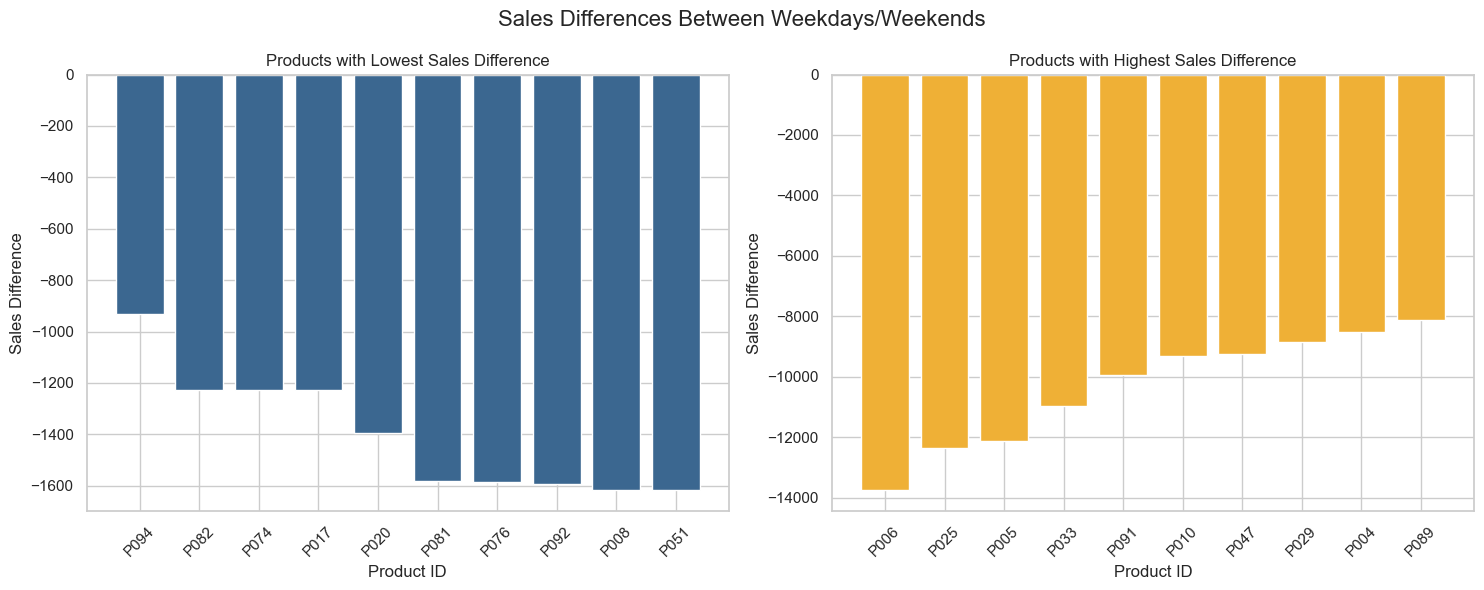

In [31]:
products_with_max_diff = sales_comparison.nlargest(10, 'difference')
products_with_min_diff = sales_comparison.nsmallest(10, 'difference')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
plt.suptitle('Sales Differences Between Weekdays/Weekends', fontsize=16)

ax1.bar(products_with_max_diff['product_id'], products_with_max_diff['difference'], color='#3B6790')
ax1.set_title('Products with Lowest Sales Difference')
ax1.set_xlabel('Product ID')
ax1.set_ylabel('Sales Difference')
ax1.tick_params(axis='x', rotation=45)

ax2.bar(products_with_min_diff['product_id'], products_with_min_diff['difference'], color='#EFB036')
ax2.set_title('Products with Highest Sales Difference')
ax2.set_xlabel('Product ID')
ax2.set_ylabel('Sales Difference')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


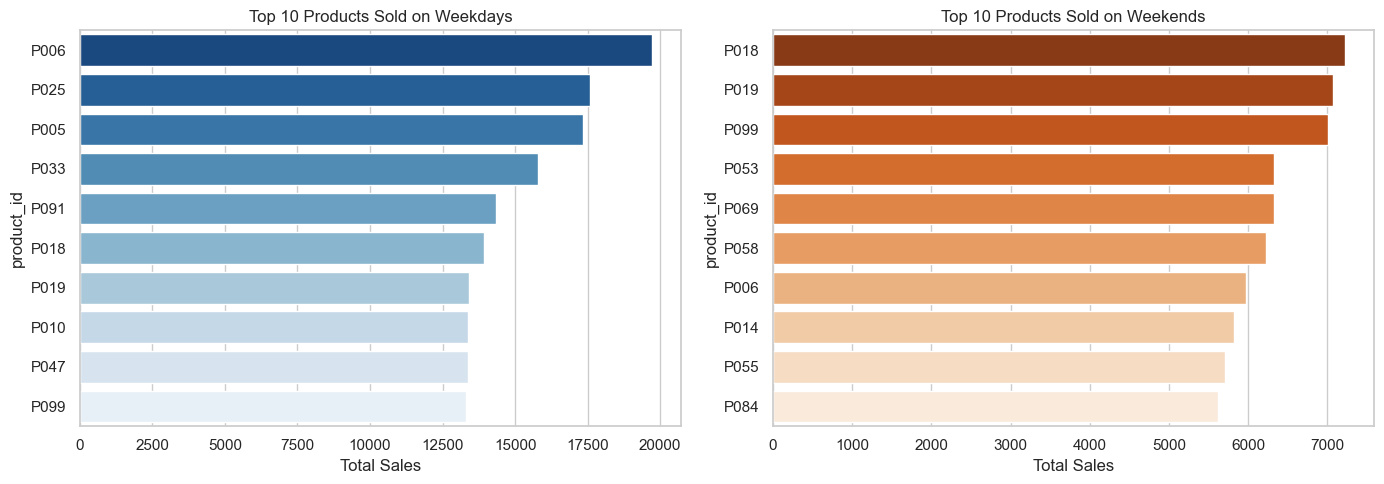

In [32]:
weekday = df[df["is_weekend"] == False].groupby("product_id")["sales"].sum().reset_index()
weekend = df[df["is_weekend"] == True].groupby("product_id")["sales"].sum().reset_index()

weekday_top5 = weekday.nlargest(10, "sales")
weekend_top5 = weekend.nlargest(10, "sales")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(data=weekday_top5, x="sales", y="product_id", ax=axes[0], palette="Blues_r")
axes[0].set_title("Top 10 Products Sold on Weekdays")
axes[0].set_xlabel("Total Sales")

sns.barplot(data=weekend_top5, x="sales", y="product_id", ax=axes[1], palette="Oranges_r")
axes[1].set_title("Top 10 Products Sold on Weekends") 
axes[1].set_xlabel("Total Sales")

plt.tight_layout()
plt.show()


In [33]:
df['is_weekend'] = df['date'].dt.weekday >= 5

all_months_popular_products = []

for month in range(1, 13):
    monthly_data = df[df['date'].dt.month == month]
    
    popular_products = monthly_data.groupby(['is_weekend', 'product_id'])['sales'].sum().reset_index()
    
    popular_products = popular_products.loc[popular_products.groupby('is_weekend')['sales'].idxmax()]
    
    popular_products['month'] = month
    popular_products['day_type'] = popular_products['is_weekend'].map({True: 'Weekend', False: 'Weekday'})
    
    all_months_popular_products.append(popular_products[['month', 'day_type', 'product_id', 'sales']])

all_months_popular_products_df = pd.concat(all_months_popular_products, ignore_index=True)

print("Most popular products for weekdays and weekends by month:")
all_months_popular_products_df

Most popular products for weekdays and weekends by month:


,month,day_type,product_id,sales
0,1,Weekday,P006,1554
1,1,Weekend,P018,601
2,2,Weekday,P006,1385
3,2,Weekend,P018,509
4,3,Weekday,P006,1613
5,3,Weekend,P099,510
6,4,Weekday,P006,1324
7,4,Weekend,P084,728
8,5,Weekday,P006,1533
9,5,Weekend,P084,620


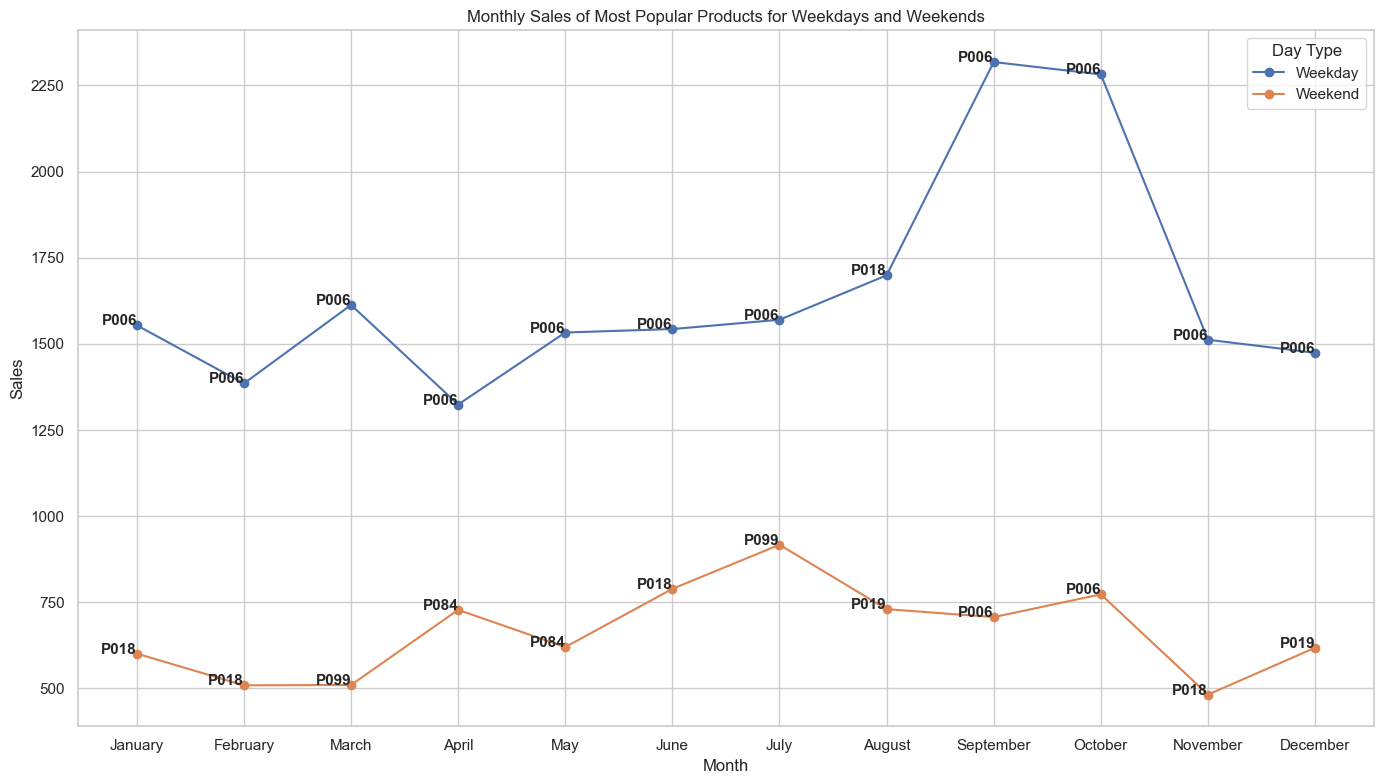

In [34]:
data = {
    'month': [1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12],
    'day_type': ['Weekday', 'Weekend'] * 12,
    'product_id': ['P006', 'P018', 'P006', 'P018', 'P006', 'P099', 'P006', 'P084', 'P006', 'P084', 'P006', 'P018', 'P006', 'P099', 'P018', 'P019', 'P006', 'P006', 'P006', 'P006', 'P006', 'P018', 'P006', 'P019'],
    'sales': [1554, 601, 1385, 509, 1613, 510, 1324, 728, 1533, 620, 1543, 789, 1570, 917, 1699, 730, 2318, 707, 2282, 773, 1512, 482, 1474, 618]
}

df = pd.DataFrame(data)

plt.figure(figsize=(14, 8))

for day_type, group in df.groupby('day_type'):
    plt.plot(group['month'], group['sales'], marker='o', label=day_type)

for i, row in df.iterrows():
    plt.text(row['month'], row['sales'], row['product_id'], fontsize=11, ha='right', weight='bold')

plt.title('Monthly Sales of Most Popular Products for Weekdays and Weekends')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(range(1, 13), ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.legend(title='Day Type')
plt.grid(True)
plt.tight_layout()
plt.show()